In [1]:
import pandas as pd
from pandas import DataFrame
from pandas import concat
from pandas import merge
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, sys
import time

In [2]:
start = time.time()

In [3]:
#数据设置

#显示所有列
pd.set_option("display.max_columns", None) 
is_saveImage = True

# 1、读入数仓数据

In [4]:
# 读取year
def read_newyear():
    df = pd.read_csv('../JN_DataWarehouse/stock_analysis/TuShare/new_year.csv' ,index_col=0)
    #df['ts_code'] = df['ts_code'].apply(str)
    #del df['Unnamed: 0']
    return df

In [5]:
%%time
df_stock_all = read_newyear()

D:\Program Files (x86)\anaconda3\envs\stock\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


Wall time: 17.2 s


# 2、 tc_code & trade_date 过滤

In [6]:
# ts_code 过滤
stock_code = "300498"
df = df_stock_all.query("ts_code.str.startswith('"+stock_code+"')",engine='python')  

In [7]:
# trade_date 过滤
df = df.query("trade_date > 20010101 & trade_date < 20201231")
df

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
5907940,300498.SZ,20151102,71.98,75.00,55.31,55.31,16.15,39.16,242.4800,181593.65,1.181060e+06
5909715,300498.SZ,20151103,58.84,60.84,55.66,60.84,55.31,5.53,10.0000,361704.23,2.142832e+06
5913288,300498.SZ,20151104,58.46,61.56,55.71,59.40,60.84,-1.44,-2.3700,317414.77,1.841590e+06
5915587,300498.SZ,20151105,59.59,61.60,57.65,58.34,59.40,-1.06,-1.7800,206147.54,1.228109e+06
5917946,300498.SZ,20151106,56.95,57.99,55.69,56.10,58.34,-2.24,-3.8400,269930.77,1.519093e+06
...,...,...,...,...,...,...,...,...,...,...,...
9945191,300498.SZ,20201126,19.14,19.40,19.13,19.24,19.13,0.11,0.5750,194389.41,3.747608e+05
9949953,300498.SZ,20201127,19.33,19.75,19.29,19.61,19.24,0.37,1.9231,353828.58,6.931651e+05
9952442,300498.SZ,20201130,19.66,19.93,19.30,19.30,19.61,-0.31,-1.5808,362180.39,7.095768e+05
9957545,300498.SZ,20201201,19.23,19.43,19.12,19.37,19.30,0.07,0.3627,267660.59,5.158638e+05


# 3、数值分析

In [8]:
df.describe()

,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
count,1.230000e+03,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1.230000e+03,1.230000e+03
mean,2.017944e+07,31.548057,32.050772,31.046496,31.535390,31.515390,0.020000,0.195096,1.912116e+05,5.982710e+05
std,1.473122e+04,8.915016,9.161422,8.626337,8.864731,8.867341,1.385888,7.275923,1.638205e+05,5.438933e+05
min,2.015110e+07,18.250000,18.590000,18.200000,18.490000,16.150000,-4.790000,-10.006100,1.197089e+04,4.420595e+04
25%,2.017022e+07,23.520000,23.790000,23.267500,23.535000,23.530000,-0.330000,-1.079950,7.070521e+04,2.083845e+05
50%,2.018052e+07,31.550000,32.110000,31.140000,31.630000,31.630000,-0.010000,-0.035000,1.376105e+05,3.960186e+05
75%,2.019083e+07,37.597500,38.087500,36.957500,37.600000,37.600000,0.300000,1.045250,2.662265e+05,8.175812e+05
max,2.020120e+07,71.980000,75.000000,57.650000,60.840000,60.840000,39.160000,242.480000,1.286440e+06,4.793401e+06


In [9]:
df.index=range(df.shape[0])
df

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
0,300498.SZ,20151102,71.98,75.00,55.31,55.31,16.15,39.16,242.4800,181593.65,1.181060e+06
1,300498.SZ,20151103,58.84,60.84,55.66,60.84,55.31,5.53,10.0000,361704.23,2.142832e+06
2,300498.SZ,20151104,58.46,61.56,55.71,59.40,60.84,-1.44,-2.3700,317414.77,1.841590e+06
3,300498.SZ,20151105,59.59,61.60,57.65,58.34,59.40,-1.06,-1.7800,206147.54,1.228109e+06
4,300498.SZ,20151106,56.95,57.99,55.69,56.10,58.34,-2.24,-3.8400,269930.77,1.519093e+06
...,...,...,...,...,...,...,...,...,...,...,...
1225,300498.SZ,20201126,19.14,19.40,19.13,19.24,19.13,0.11,0.5750,194389.41,3.747608e+05
1226,300498.SZ,20201127,19.33,19.75,19.29,19.61,19.24,0.37,1.9231,353828.58,6.931651e+05
1227,300498.SZ,20201130,19.66,19.93,19.30,19.30,19.61,-0.31,-1.5808,362180.39,7.095768e+05
1228,300498.SZ,20201201,19.23,19.43,19.12,19.37,19.30,0.07,0.3627,267660.59,5.158638e+05


In [10]:
# 日期转换
df["trade_date"] = pd.to_datetime(df["trade_date"], format='%Y%m%d')
df["trade_date"] = df['trade_date'].apply(lambda x: x.strftime('%Y-%m-%d'))

In [11]:
# 输入year
df["year"] = pd.to_datetime(df['trade_date'], format='%Y-%m-%d').dt.year
df["year"].head()

0    2015
1    2015
2    2015
3    2015
4    2015
Name: year, dtype: int64

### A、每年的最大4\最小4\平均\收盘值

In [12]:
from datetime import datetime

def peak_range(df):
    #返回数据范围差值
    return (df.max() + df.min())/2


df_temp1 = df.groupby(['year']).agg({'high':'max','low':'min','close':'min'})
df_temp1['mean']=(df_temp1['high'] + df_temp1['low'])/2
df_mean1 = df_temp1[['mean','close']]
df_mean1.T

year,2015,2016,2017,2018,2019,2020
mean,60.00,43.615,27.95,23.56,35.755,28.42
close,45.74,32.730,19.71,20.00,26.150,18.49


In [13]:
df_high3 = (df.groupby(['year'])['high']
                .apply(lambda x: x.nlargest(4))
                .reset_index(level=1, drop=True)
                .to_frame('high'))

df_high3 = df_high3.set_index(np.arange(len(df_high3)) % 4, append=True)['high'].unstack().add_prefix('high')
df_high3.sort_values('year', ascending=False).T

year,2020,2019,2018,2017,2016,2015
high0,38.64,45.55,27.50,36.50,54.54,75.00
high1,38.60,45.32,27.49,36.33,54.17,61.60
high2,38.20,44.46,27.48,36.31,53.96,61.56
high3,38.16,43.91,27.35,36.20,53.82,60.84


In [14]:
df_temp = df
df_temp['low'] = df_temp['low']*-1  # 因为没有最小的5个值的函数，所以要先用相反数

df_low3 = (df_temp.groupby(['year'])['low']
                .apply(lambda x: x.nlargest(4))
                .reset_index(level=1, drop=True)
                .to_frame('low')
                )

df_low3.set_index(np.arange(len(df_low3)) % 4, append=True)['low'].unstack().add_prefix('low')
df_low3['low'] = df_low3['low']*-1
df_low3 = df_low3.set_index(np.arange(len(df_low3)) % 4, append=True)['low'].unstack().add_prefix('low')
df_low3.sort_values('year', ascending=False).T

year,2020,2019,2018,2017,2016,2015
low0,18.20,25.96,19.62,19.40,32.69,45.00
low1,18.23,25.98,19.92,19.61,32.74,45.12
low2,18.32,26.40,19.96,19.67,32.74,45.60
low3,18.42,26.74,20.01,19.71,33.04,45.60


In [15]:
df_result = merge(df_high3, df_mean1,  on='year')
df_result = merge(df_result, df_low3,  on='year')
df_result

,high0,high1,high2,high3,mean,close,low0,low1,low2,low3
year,,,,,,,,,,
2015,75.00,61.60,61.56,60.84,60.000,45.74,45.00,45.12,45.60,45.60
2016,54.54,54.17,53.96,53.82,43.615,32.73,32.69,32.74,32.74,33.04
2017,36.50,36.33,36.31,36.20,27.950,19.71,19.40,19.61,19.67,19.71
2018,27.50,27.49,27.48,27.35,23.560,20.00,19.62,19.92,19.96,20.01
2019,45.55,45.32,44.46,43.91,35.755,26.15,25.96,25.98,26.40,26.74
2020,38.64,38.60,38.20,38.16,28.420,18.49,18.20,18.23,18.32,18.42


In [16]:
df_result.index

Int64Index([2015, 2016, 2017, 2018, 2019, 2020], dtype='int64', name='year')

In [17]:
print(stock_code)

300498


### B、读入BPS（每股净资产）数据

In [18]:
# 插入py文件，调用里面的函数
from Stock_Interface import read_finance_year

In [19]:
df_bps = read_finance_year.read_bps(stock_code)
stock_name = df_bps['name'].values[0]                     # DataFrame 取 某列首行
df_bps[['ts_code','name','2020','2019','2018','2017','2016','2015','2014','2013','2012','2011','2010','2009','2008','2007','2006','2005','2004','2003','2002','2001']].head()

,ts_code,name,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001
1963,300498,温氏股份,6.9755,8.4932,6.5063,6.2479,7.002,6.1414,4.7097,3.8365,4.1857,3.3408,2.3591,2.1147,2.2154,9.6636,5.4576,NaN,NaN,NaN,NaN,NaN


### C、读入ROE（净资产收益率）数据

In [20]:
df_roe = read_finance_year.read_roe(stock_code)
df_roe.head()

,ts_code,name,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001
1964,300498,温氏股份,8.79,35.69,11.89,21.65,43.48,34.95,19.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### D、读入P/E （市盈率）数据

In [21]:
df_pe = read_finance_year.read_pe(stock_code)
df_pe[['ts_code','name','2020','2019','2018','2017','2016','2015','2014','2013','2012','2011','2010','2009','2008','2007','2006','2005','2004','2003','2002','2001']].head()

,ts_code,name,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001
1964,300498,温氏股份,16.48,20.69,15.8,14.18,16.83,17.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### E、读入EPS（每股收益）数据

In [22]:
df_eps = read_finance_year.read_eps(stock_code)
df_eps[['ts_code','name','2020','2019','2018','2017','2016','2015','2014','2013','2012','2011','2010','2009','2008','2007','2006','2005','2004','2003','2002','2001']].head()

,ts_code,name,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001
1963,300498,温氏股份,0.6541,2.6445,0.7511,1.2932,2.7101,1.71,0.84,NaN,NaN,NaN,NaN,NaN,NaN,4.6,NaN,NaN,NaN,NaN,NaN,NaN


### F、读入年度分红

In [23]:
df_bonus = read_finance_year.read_bonus(stock_code)
df_bonus[['ts_code','name','2020','2019','2018','2017','2016','2015','2014','2013','2012','2011','2010','2009','2008','2007','2006','2005','2004','2003','2002','2001']].head()

,ts_code,name,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001
1979,300498,温氏股份,NaN,13.0,5.0,3.93,15.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 4、数据合并

In [24]:
df_result = read_finance_year.cal_bps(df_bps, df_result)

df_result = read_finance_year.cal_roe(df_roe, df_result)

df_result = read_finance_year.cal_eps(df_eps, df_result)

df_result = read_finance_year.cal_pe(df_pe, df_result)

df_result = read_finance_year.cal_bonus(df_bonus, df_result)

D:\Program Files (x86)\anaconda3\envs\stock\lib\site-packages\numpy\core\numeric.py:2327: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return bool(asarray(a1 == a2).all())


In [25]:
df_map = df_result.copy()
df_map.pop('high0')
df_map.pop('high1')
#df_map.pop('high2')
df_map.pop('low0')
df_map.pop('low1')
#df_map.pop('low2')
df_map.pop('low3')
df_map.pop('mean')
df_map.pop('close')
#df_map.pop('bps')
df_map.pop('roe')
df_map.pop('pe')
df_map = df_map.set_index('year')
print(stock_name)

温氏股份


# 5、数据分析模型显示


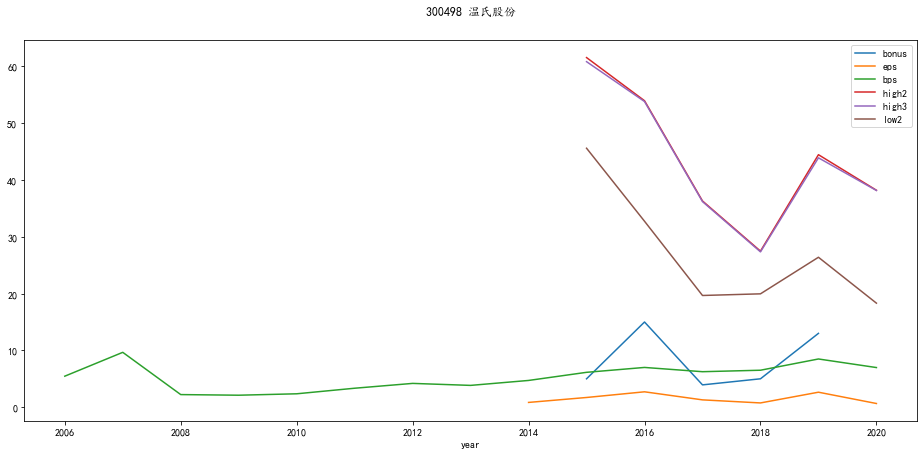

In [26]:
#解决中文显示问题
plt.rcParams['font.sans-serif'] = ['KaiTi'] # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题

ax = df_map.plot(figsize = (16, 7))
ax.set_title(stock_code +' ' + stock_name, fontsize=12, position=(0.5,1.05))
if is_saveImage :
    plt.savefig("../JN_DataWarehouse/stock_analysis/result/"+stock_code+'_'+stock_name+".png")#保存图片
plt.show()

# 6、数据列表显示(并把结果保存到excel）

In [27]:
df_result['high3/bps'] = (df_result['high3']/df_result['bps']).values.astype(float).round(2)
df_result['low3/bps'] = (df_result['low3']/df_result['bps']).values.astype(float).round(2)
df_result['bonus/low3'] = (df_result['bonus']*10/df_result['low3']).values.astype(float).round(2)
df_result['差'] = df_result['high3/bps'] - df_result['low3/bps']
df_result.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
year,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
bonus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,15,3.93,5,13,NaN
pe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.75,16.83,14.18,15.8,20.69,16.48
eps,NaN,NaN,NaN,NaN,NaN,NaN,4.6,NaN,NaN,NaN,NaN,NaN,NaN,0.84,1.71,2.71,1.29,0.75,2.64,0.65
roe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.93,34.95,43.48,21.65,11.89,35.69,8.79
bps,NaN,NaN,NaN,NaN,NaN,5.46,9.66,2.22,2.11,2.36,3.34,4.19,3.84,4.71,6.14,7,6.25,6.51,8.49,6.98
high0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75,54.54,36.5,27.5,45.55,38.64
high1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.6,54.17,36.33,27.49,45.32,38.6
high2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.56,53.96,36.31,27.48,44.46,38.2
high3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.84,53.82,36.2,27.35,43.91,38.16


In [28]:
df_result.style.\
                format('{:.2f}').\
                set_caption(stock_code+' - '+stock_name).\
                hide_index().bar('high3/bps',vmin=0).\
                hide_index().bar('high3',vmin=0, color='green').\
                highlight_min('low2',color='red').\
                highlight_max('high2',color='red').\
                background_gradient(subset=['bps'], cmap='BuGn').\
                background_gradient(subset=['roe'], cmap='Blues').\
                background_gradient(subset=['pe'], cmap='Purples').\
                background_gradient(subset=['eps'], cmap='Oranges').\
                highlight_null(null_color='gray')

year,bonus,pe,eps,roe,bps,high0,high1,high2,high3,mean,close,low0,low1,low2,low3,high3/bps,low3/bps,bonus/low3,差
2001.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2002.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2003.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2004.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2005.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2006.00,nan,nan,nan,nan,5.46,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2007.00,nan,nan,4.60,nan,9.66,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2008.00,nan,nan,nan,nan,2.22,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2009.00,nan,nan,nan,nan,2.11,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2010.00,nan,nan,nan,nan,2.36,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [29]:
# !pip install XlsxWriter --user

In [30]:
import xlsxwriter

df_result.style.\
                format('{:.2f}').\
                set_caption(stock_code+' - '+stock_name).\
                hide_index().bar('high3/bps',vmin=0).\
                hide_index().bar('high3',vmin=0, color='green').\
                highlight_min('low2',color='red').\
                highlight_max('high2',color='red').\
                background_gradient(subset=['bps'], cmap='BuGn').\
                background_gradient(subset=['roe'], cmap='Blues').\
                background_gradient(subset=['pe'], cmap='Purples').\
                background_gradient(subset=['eps'], cmap='Oranges').\
                highlight_null(null_color='gray').\
                to_excel('../JN_DataWarehouse/stock_analysis/result/'+stock_code+'_'+stock_name+'.xlsx', engine='xlsxwriter')

In [31]:
print('finish:%.4f'%(time.time()-start))

finish:49.0175
